In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import seaborn as sns
import matplotlib.pylab as pylab

import os

# get_ipython().run_line_magic('matplotlib', 'inline')

# mpl.rcParams.update(mpl.rcParamsDefault) # reset matplotlib settings

In [2]:
THR_COL = 'threads'
INDEX_COL = 'threads'

thr_ck = pd.read_csv('../../data/grppi_kalman/throughput_crosskalman.csv', index_col=INDEX_COL)
thr_gfk = pd.read_csv('../../data/grppi_kalman/throughput_farm_ck.csv', index_col=INDEX_COL)
thr_gfkn = pd.read_csv('../../data/grppi_kalman/throughput_farm_nopin_ck.csv', index_col=INDEX_COL)
thr_gpk = pd.read_csv('../../data/grppi_kalman/throughput_pipeline_ck.csv', index_col=INDEX_COL)

wt_ck = pd.read_csv('../../data/grppi_kalman/times_crosskalman.csv', index_col=INDEX_COL)
wt_gfk = pd.read_csv('../../data/grppi_kalman/times_farm_ck.csv', index_col=INDEX_COL)
wt_gpk = pd.read_csv('../../data/grppi_kalman/times_pipeline_ck.csv', index_col=INDEX_COL)

cache_rates = pd.read_csv('../../data/grppi_kalman/cache_hit_rate.csv')

pylab.rcParams['figure.figsize'] = 20, 14 # figure size
fsize = 44 # font size
leg_fsize = 36 # legend
mark_size = 18 # marker
offset_size = 30 # scientific exponent size

# pylab.rcParams['figure.figsize'] = 10, 7
# fsize = 22
# leg_fsize = 16
# mark_size = 9
# offset_size = 15


####################################################################
# Save figures
####################################################################
def saveFig(myplt, filename, tight=False):
    if (tight):    
        myplt.savefig("../../output/grppi_kalman/" + filename + ".svg", bbox_inches='tight')
    else:
        myplt.savefig("../../output/grppi_kalman/" + filename + ".svg")
    # convert to PDF with system Inkscape (installed)
    os.system("inkscape ../../output/grppi_kalman/" + filename + ".svg --export-pdf=../../output/grppi_kalman/pdf/" + filename + ".pdf")
    # clear figures
    myplt.show()
    myplt.gcf().clear()

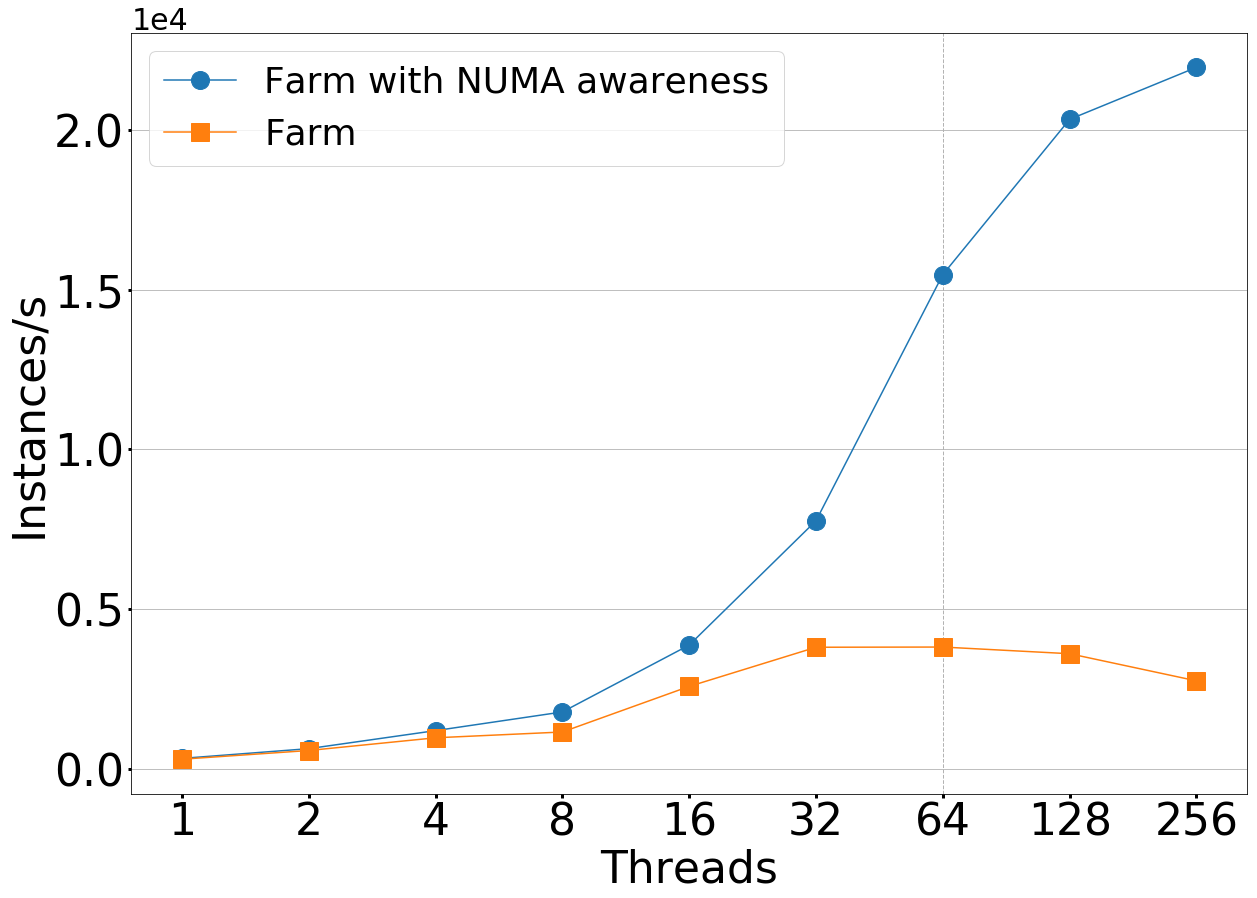

In [3]:
####################################################################
# GrPPI + NUMA vs original GrPPI
####################################################################
threads = list(thr_gfk.index.values)

plt.axvline(x=64, color='#b3b3b3', linewidth=1, linestyle='--')

plt.plot(threads, thr_gfk['inst_s'], 
         markersize=mark_size, marker='o', label="Farm with NUMA awareness")
plt.plot(threads, thr_gfkn['inst_s'], 
         markersize=mark_size, marker='s', label="Farm")

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

plt.xlabel("Threads", fontsize=fsize)
plt.ylabel("Instances/s", fontsize=fsize)

plt.xscale("log", basex=2)
plt.xticks(threads, [str(x) for x in threads], fontsize=fsize)
plt.yticks(fontsize=fsize)
plt.legend(loc=2, fontsize=leg_fsize)

ax = plt.gca()
ax.tick_params(width=3) # ticks width
ax.get_yaxis().get_offset_text().set_size(offset_size) # scientific exponent size
ax.yaxis.grid(True) # horizontal grid

saveFig(plt, "grppi_nopin_vs_pin")

In [4]:
####################################################################
# Throughput diff: ck vs grppi_k vs pipeline_k
####################################################################

threads = list(thr_ck.index.values)

plt.axvline(x=64, color='#b3b3b3', linewidth=1, linestyle='--')

plt.plot(threads, thr_ck['inst_s'], 
         markersize=mark_size, marker='o', label="Baseline")
plt.plot(threads, thr_gfk['inst_s'], 
         markersize=mark_size, marker='s', label="Farm")
plt.plot(threads, thr_gpk['inst_s'], 
         markersize=mark_size, marker='x', label="Pipeline")

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

# plt.title("Throughput - kalman filter processing", fontsize=fsize)
plt.xlabel("Threads", fontsize=fsize)
plt.ylabel("Instances/s", fontsize=fsize)

plt.xscale("log", basex=2)
plt.xticks(threads, [str(x) for x in threads], fontsize=fsize)
plt.yticks(fontsize=fsize)
plt.legend(loc=2, fontsize=leg_fsize)

ax = plt.gca()
ax.tick_params(width=3) # ticks width
ax.get_yaxis().get_offset_text().set_size(offset_size) # scientific exponent size
ax.yaxis.grid(True) # horizontal grid

saveFig(plt, "all_processing")

In [5]:
####################################################################
# Throughput cross_kalman
####################################################################
threads = list(thr_ck.index.values)

plt.axvline(x=64, color='#b3b3b3', linewidth=1, linestyle='--')

plt.plot(threads, thr_ck['inst_s'], 
         markersize=mark_size, marker='o', label="Total throughput")
plt.plot(threads, thr_ck['kf_inst_s'], 
         markersize=mark_size, marker='s', label="Kalman filtering")
plt.plot(threads, thr_ck['proc_n_cp'], 
         markersize=mark_size, marker='x', label="Kalman filtering + copies")

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

# plt.title("Cross-kalman measurements differences", fontsize=fsize)
plt.xlabel("Threads", fontsize=fsize)
plt.ylabel("instances/s", fontsize=fsize)

plt.xscale("log", basex=2)
plt.xticks(threads, [str(x) for x in threads], fontsize=fsize)
plt.yticks(fontsize=fsize)
plt.legend(loc=2, fontsize=leg_fsize)

ax = plt.gca()
ax.tick_params(width=3) # ticks width
ax.get_yaxis().get_offset_text().set_size(offset_size) # scientific exponent size
ax.yaxis.grid(True) # horizontal grid

saveFig(plt, "cross_kalman_measurements")

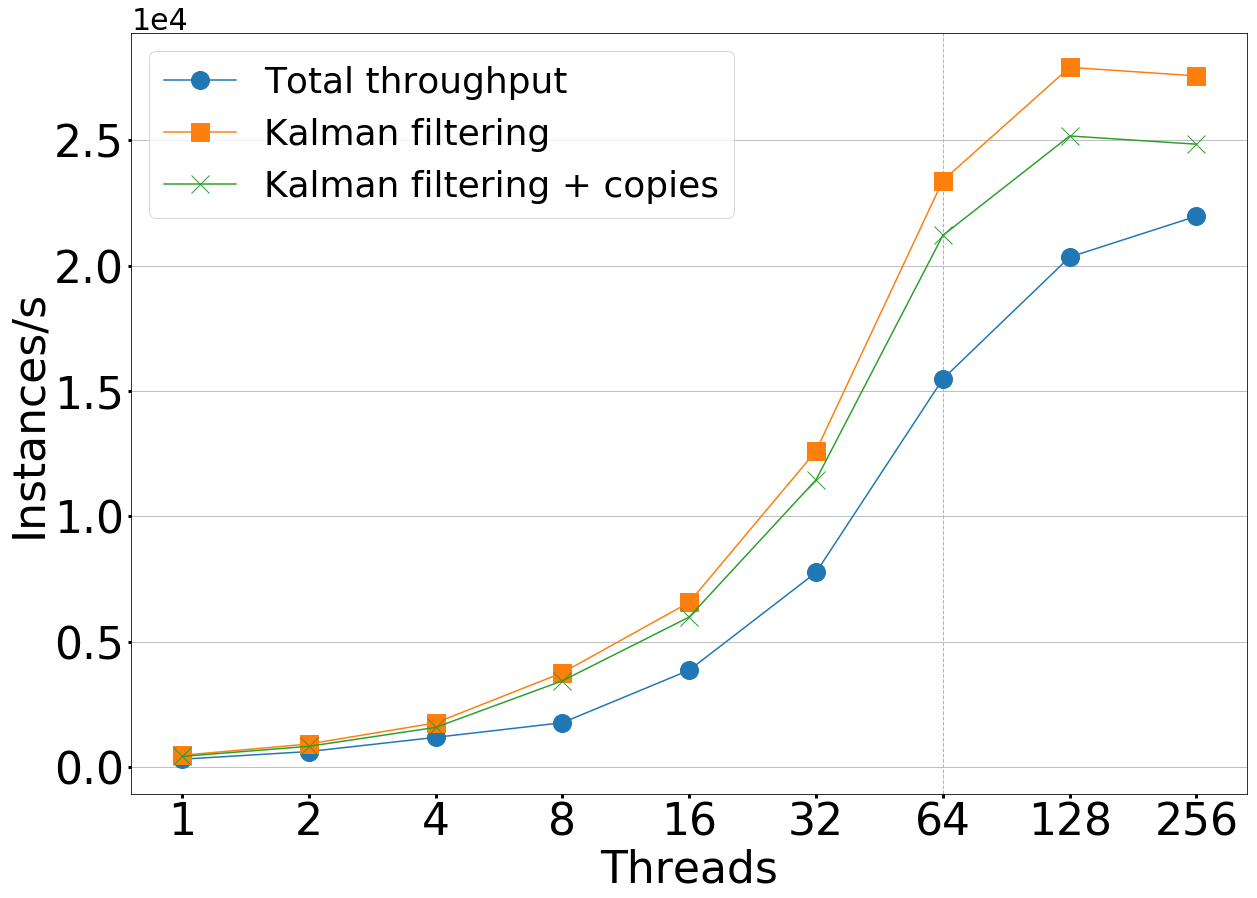

In [6]:
####################################################################
# Throughput GrPPI
####################################################################
threads = list(thr_gfk.index.values)

plt.axvline(x=64, color='#b3b3b3', linewidth=1, linestyle='--')

plt.plot(threads, thr_gfk['inst_s'], 
         markersize=mark_size, marker='o', label="Total throughput")
plt.plot(threads, thr_gfk['kf_inst_s'], 
         markersize=mark_size, marker='s', label="Kalman filtering")
plt.plot(threads, thr_gfk['proc_n_cp'], 
         markersize=mark_size, marker='x', label="Kalman filtering + copies")

# plt.title("GrPPI measurements differences", fontsize=fsize)
plt.xlabel("Threads", fontsize=fsize)
plt.ylabel("Instances/s", fontsize=fsize)

plt.xscale("log", basex=2)
plt.xticks(threads, [str(x) for x in threads], fontsize=fsize)
plt.yticks(fontsize=fsize)
plt.legend(loc=2, fontsize=leg_fsize)

ax = plt.gca()
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # force scientitic format
ax.tick_params(width=3) # ticks width
ax.get_yaxis().get_offset_text().set_size(offset_size) # scientific exponent size
ax.yaxis.grid(True) # horizontal grid

saveFig(plt, "grppi_measurements")

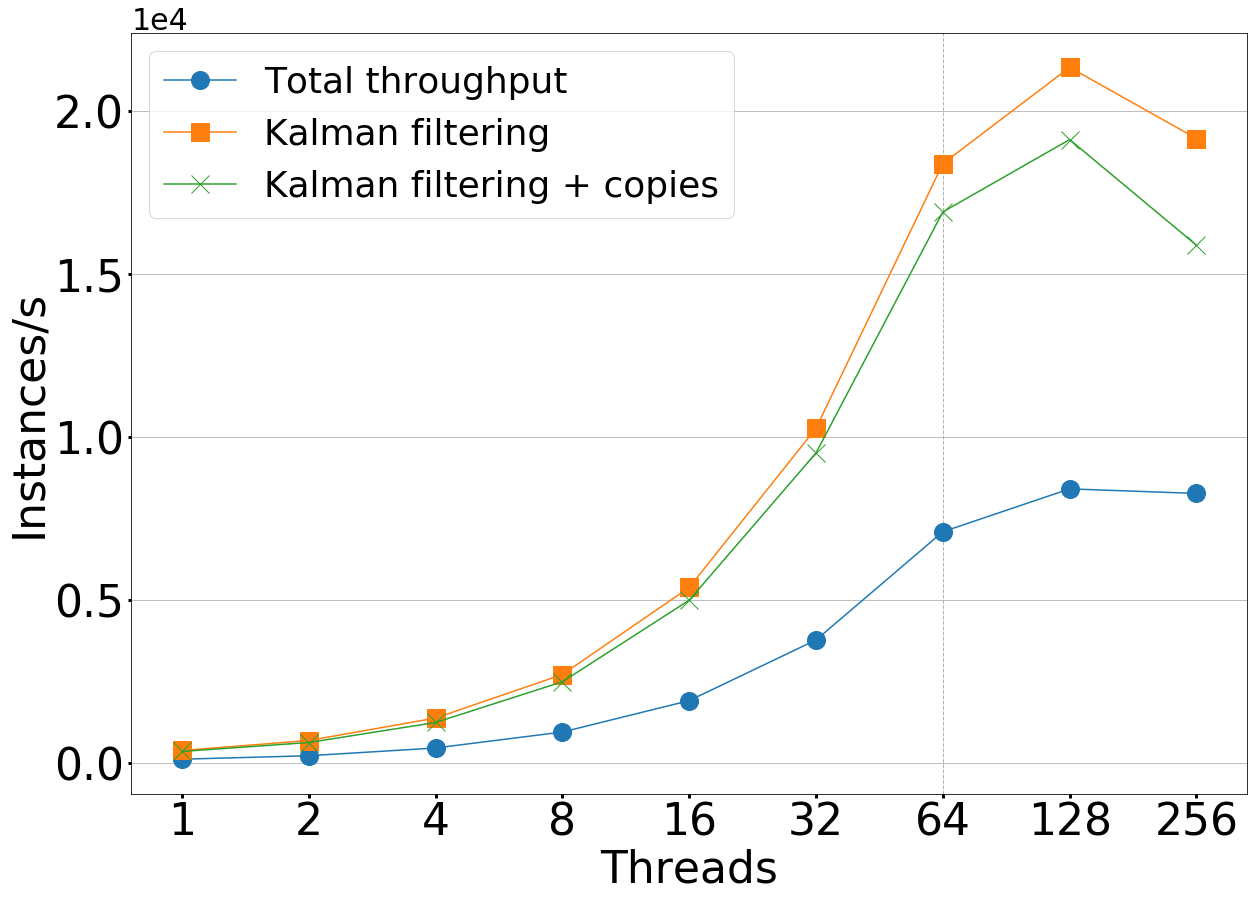

In [7]:
####################################################################
# Throughput pipeline_kalman
####################################################################
threads = list(thr_gpk.index.values)

plt.axvline(x=64, color='#b3b3b3', linewidth=1, linestyle='--')

plt.plot(threads, thr_gpk['inst_s'], 
         markersize=mark_size, marker='o', label="Total throughput")
plt.plot(threads, thr_gpk['kf_inst_s'], 
         markersize=mark_size, marker='s', label="Kalman filtering")
plt.plot(threads, thr_gpk['proc_n_cp'], 
         markersize=mark_size, marker='x', label="Kalman filtering + copies")

# plt.title("Pipeline measurements differences", fontsize=fsize)
plt.xlabel("Threads", fontsize=fsize)
plt.ylabel("Instances/s", fontsize=fsize)

plt.xscale("log", basex=2)
plt.xticks(threads, [str(x) for x in threads], fontsize=fsize)
plt.yticks(fontsize=fsize)
plt.legend(loc=2, fontsize=leg_fsize)

ax = plt.gca()
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # force scientitic format
ax.tick_params(width=3) # ticks width
ax.get_yaxis().get_offset_text().set_size(offset_size) # scientific exponent size
ax.yaxis.grid(True) # horizontal grid

saveFig(plt, "pipeline_measurements")

In [14]:
####################################################################
# Scalability calculation methods
####################################################################
def plot_scalability_kf(data, mark, pre_label, threads):
    processing_seq = data['processing_norm'].iloc[0]
    
    processing_scal = []
    for index,row in data.iterrows():
        processing_scal.append(processing_seq / row['processing_norm'])

    plt.plot(threads, processing_scal, 
             markersize=mark_size, marker=mark, label=pre_label + " Kalman filtering")
    
def plot_scalability_total(data, mark, pre_label, threads):
    total_seq = data['total_time'].iloc[0]

    total_scal = []
    for index,row in data.iterrows():
        total_scal.append(total_seq / row['total_time'])

    plt.plot(threads, total_scal, 
             markersize=mark_size, marker=mark, label=pre_label)

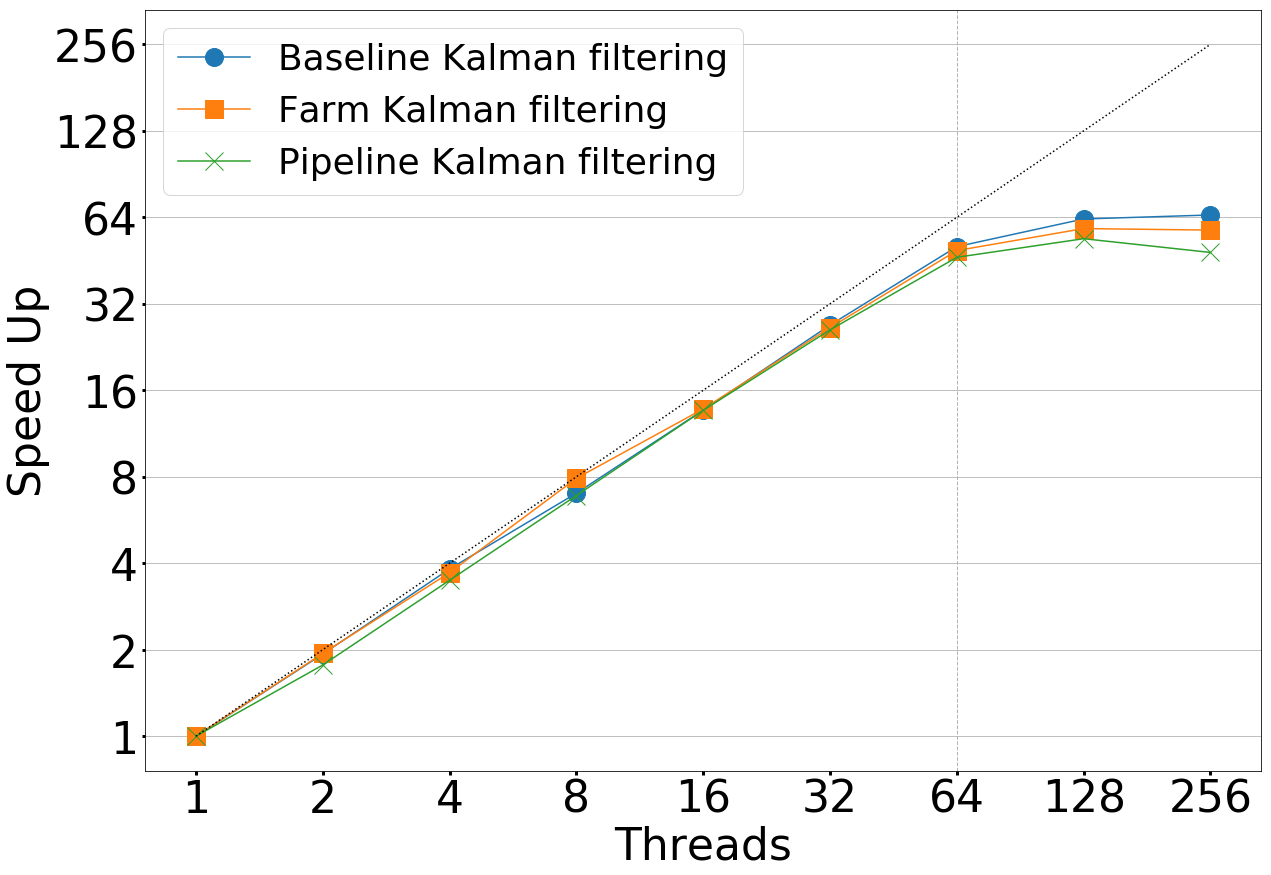

In [16]:
####################################################################
# Scalability kalman filtering
####################################################################
threads = list(wt_ck.index.values)

plt.axvline(x=64, color='#b3b3b3', linewidth=1, linestyle='--')

plot_scalability_kf(wt_ck, 'o', "Baseline", threads)
plot_scalability_kf(wt_gfk, 's', "Farm", threads)
plot_scalability_kf(wt_gpk, 'x', "Pipeline", threads)

plt.plot(threads, threads, ':k')

# plt.title("Scalability cross-kalman vs Farm vs Pipeline", fontsize=fsize)
plt.xlabel("Threads", fontsize=fsize)
plt.ylabel("Speed Up", fontsize=fsize)

plt.xscale("log", basex=2)
plt.xticks(threads, [str(x) for x in threads], fontsize=fsize)
plt.yscale("log", basey=2)
plt.yticks(threads, [str(x) for x in threads], fontsize=fsize)
plt.legend(loc=2, fontsize=leg_fsize)

ax = plt.gca()
ax.tick_params(width=3)
ax.yaxis.grid(True) # horizontal grid

saveFig(plt, "scalability_processing")

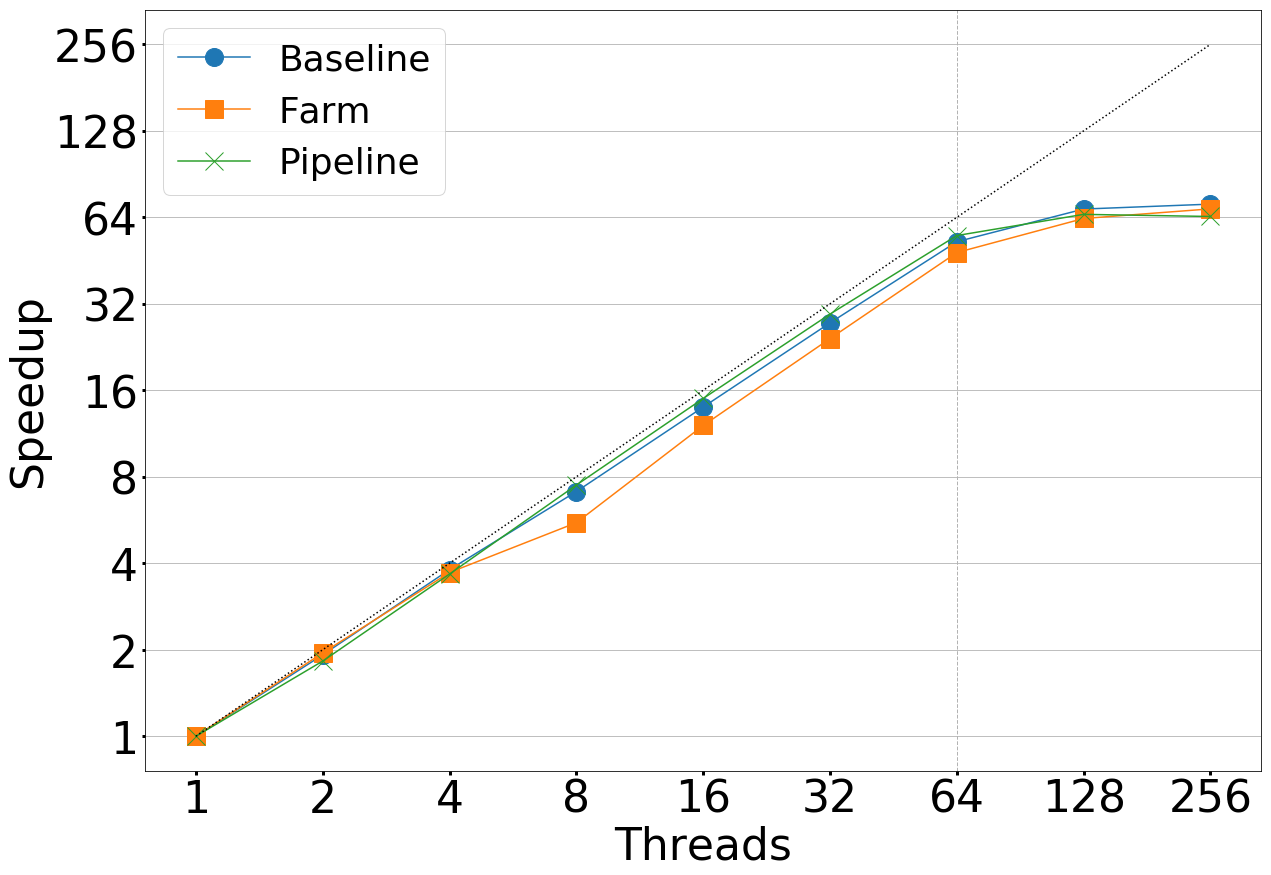

In [10]:
####################################################################
# Scalability total
####################################################################
threads = list(wt_ck.index.values)

plt.axvline(x=64, color='#b3b3b3', linewidth=1, linestyle='--')

plot_scalability_total(wt_ck, 'o', "Baseline", threads)
plot_scalability_total(wt_gfk, 's', "Farm", threads)
plot_scalability_total(wt_gpk, 'x', "Pipeline", threads)

plt.plot(threads, threads, ':k')

# plt.title("Scalability cross-kalman vs Farm vs Pipeline", fontsize=fsize)
plt.xlabel("Threads", fontsize=fsize)
plt.ylabel("Speedup", fontsize=fsize)

plt.xscale("log", basex=2)
plt.xticks(threads, [str(x) for x in threads], fontsize=fsize)
plt.yscale("log", basey=2)
plt.yticks(threads, [str(x) for x in threads], fontsize=fsize)
plt.legend(loc=2, fontsize=leg_fsize)

ax = plt.gca()
ax.tick_params(width=3)
ax.yaxis.grid(True) # horizontal grid

saveFig(plt, "scalability_total")

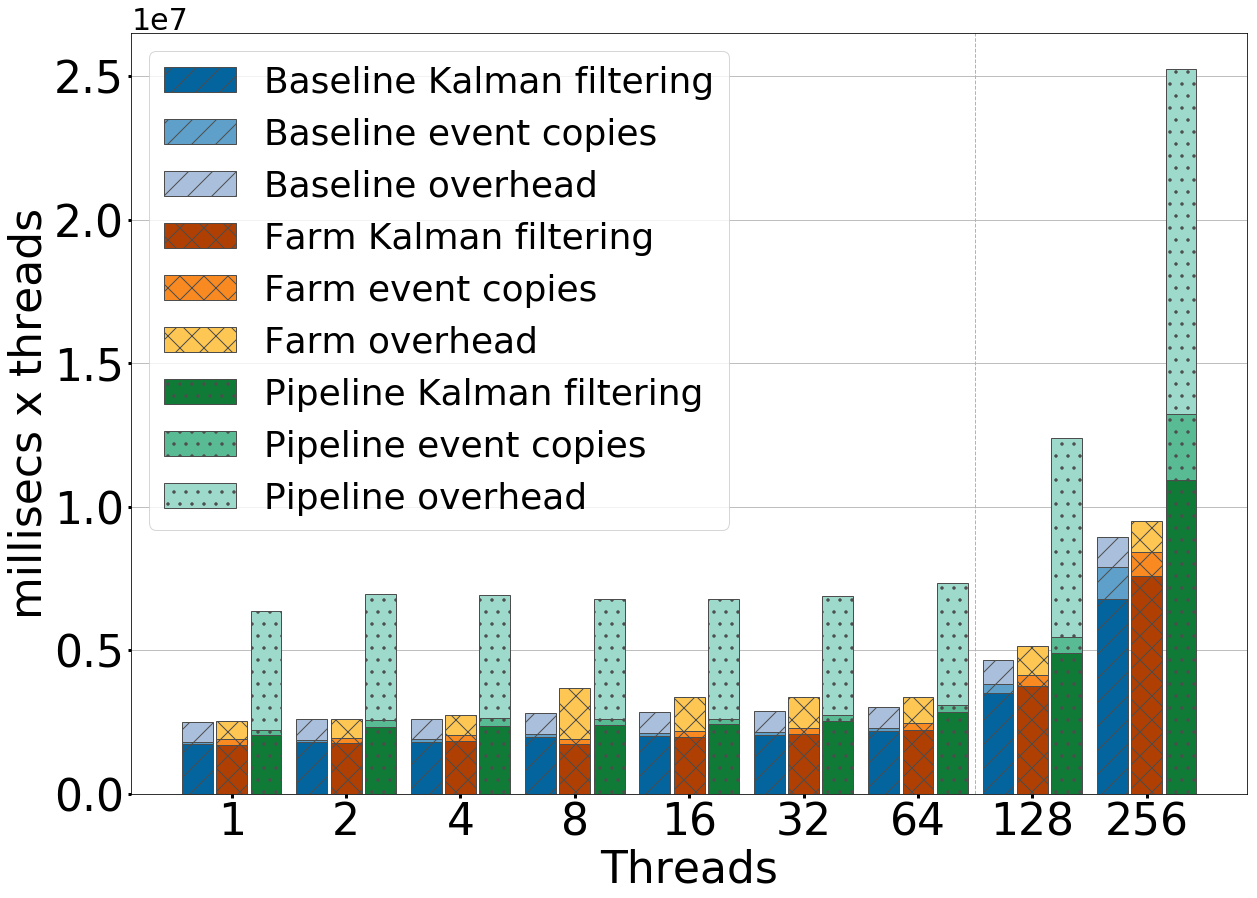

In [11]:
####################################################################
# Bar plots with times
####################################################################

bwidth = 0.27
def plot_bar(data, pos, pre_label, colors, hatch=None):
    
    processing_t = data['processing_norm'] * data.index    
    copies_t = data['copies_norm'] * data.index
    overhead_t = (data['total_time'] - (data['processing_norm'] + data['copies_norm'])) * data.index

    # position of the bars, as they grow exp, the log will keep it normal (0,1,2,3...)
    threads = [np.log2(t)+pos for t in data.index.values]

    plt.bar(threads, processing_t, 
            bwidth, edgecolor='#4d4d4d', 
            color=colors[8], hatch=hatch, label=pre_label + ' Kalman filtering')
    plt.bar(threads, copies_t, 
            bwidth, bottom=processing_t, edgecolor='#4d4d4d', 
            color=colors[5], hatch=hatch, label=pre_label + ' event copies')
    plt.bar(threads, overhead_t, 
            bwidth, bottom = (processing_t + copies_t), edgecolor='#4d4d4d', 
            color=colors[3], hatch=hatch, label=pre_label + ' overhead')

threads = list(wt_ck.index.values)

color1 = sns.color_palette("PuBu", 10)
color2 = sns.color_palette("BuGn", 10)
color3 = sns.color_palette("YlOrBr", 10)

plt.axvline(x=6.5, color='#b3b3b3', linewidth=1, linestyle='--')

plot_bar(wt_ck, -0.3, "Baseline", color1, '/')
plot_bar(wt_gfk, 0, "Farm", color3, 'x')
plot_bar(wt_gpk, 0.3, "Pipeline", color2, '.')

plt.legend(loc=2, fontsize=leg_fsize)

plt.xticks(range(len(threads)), [str(x) for x in threads], fontsize=fsize)

# ax = plt.gca()
# xt = ax.get_xticks()
# # This is very crappy, I have to use the original index - 1 for reasons
# # ax.set_xticklabels(threads, fontsize=fsize)
# ax.set_xticklabels(wt_ck[1:].index.values, fontsize=fsize)

plt.yticks(fontsize=fsize)

plt.xlabel("Threads", fontsize=fsize)
plt.ylabel("millisecs x threads", fontsize=fsize)

# Set the scientific exponent font size
ax = plt.gca()
ax.get_yaxis().get_offset_text().set_size(30)
ax.tick_params(width=3)
ax.yaxis.grid(True) # horizontal grid
ax.set_axisbelow(True)

saveFig(plt, "timings_comp")

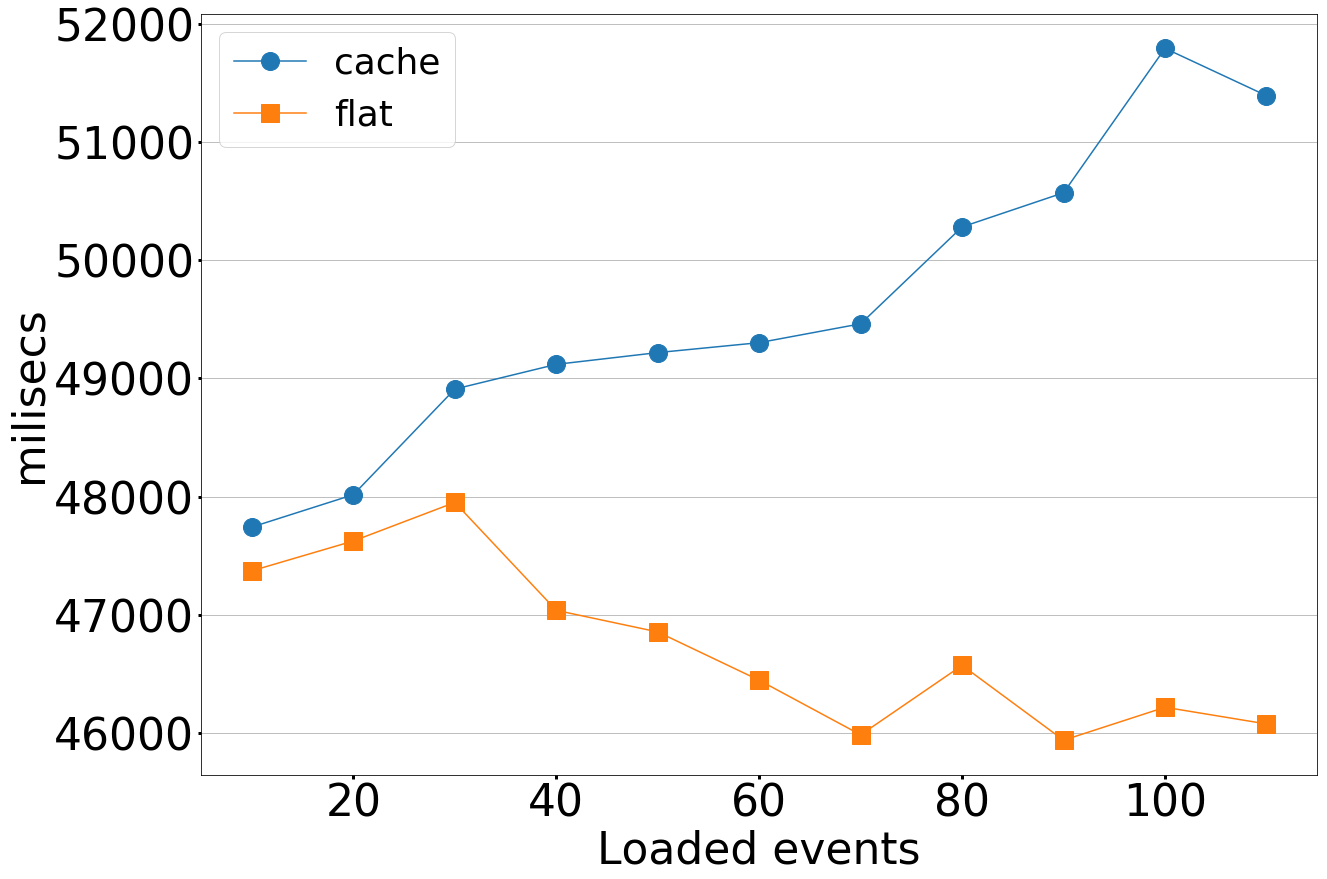

In [12]:
####################################################################
# Flat vs Cache
####################################################################

cache_path = "../../data/grppi_kalman/gck_256thrs_same62mbevent_50kwarm_100kevents_cache.csv"
cache_df = pd.read_csv(cache_path)
cache_df_av = cache_df.groupby("f_amount").mean()

flat_path = "../../data/grppi_kalman/gck_256thrs_same62mbevent_50kwarm_100kevents_flat.csv"
flat_df = pd.read_csv(flat_path)
flat_df_av = flat_df.groupby("f_amount").mean()


files = list(cache_df_av.index.values)
files1 = list(flat_df_av.index.values)

plt.plot(files, cache_df_av['total_time'], 
         markersize=mark_size, marker='o', label="cache")

plt.plot(files1, flat_df_av['total_time'], 
         markersize=mark_size, marker='s', label="flat")

# plt.title("Pipeline measurements differences", fontsize=fsize)
plt.xlabel("Loaded events", fontsize=fsize)
plt.ylabel("milisecs", fontsize=fsize)

plt.xticks(fontsize=fsize)
plt.yticks(fontsize=fsize)
plt.legend(loc=2, fontsize=leg_fsize)

ax = plt.gca()
# plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # force scientitic format
ax.tick_params(width=3) # ticks width
ax.get_yaxis().get_offset_text().set_size(offset_size) # scientific exponent size
ax.yaxis.grid(True) # horizontal grid

saveFig(plt, "flat_vs_cache")

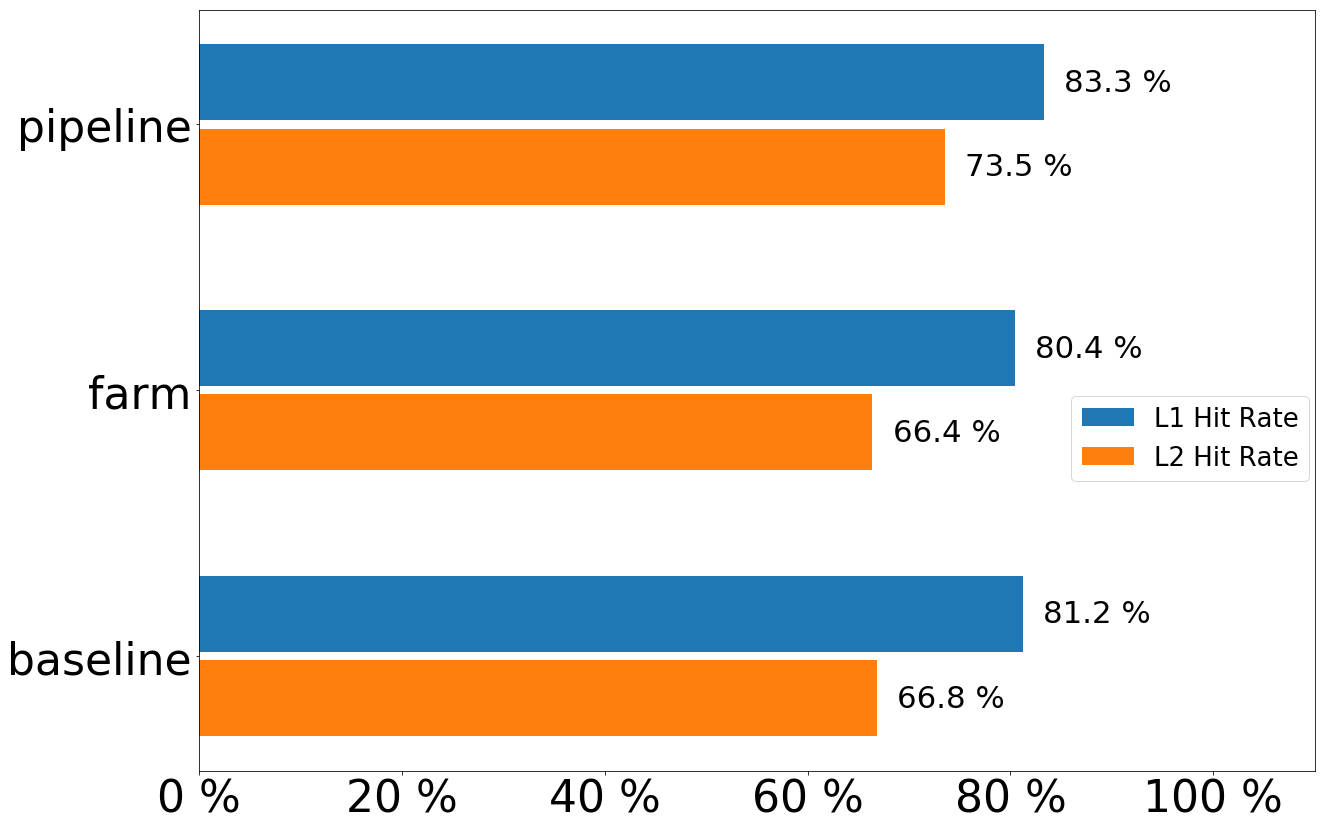

In [13]:
####################################################################
# Cache Hit Rate
####################################################################

move = 0.111
bwidth = 0.2
factor = 0.7

vals1 = [(t*factor)+move for t in cache_rates.index.values]
plt.barh(vals1, cache_rates['L1 Hit Rate'], bwidth, label='L1 Hit Rate')

vals2 = [(t*factor)-move for t in cache_rates.index.values]
plt.barh(vals2, cache_rates['L2 Hit Rate'], bwidth, label='L2 Hit Rate')

plt.xticks(fontsize=fsize)
plt.xlim(0, 110)
plt.legend(bbox_to_anchor=(0.77, 0.51), fontsize=leg_fsize-10)

vals = [(t*factor) for t in cache_rates.index.values]
plt.yticks(vals, cache_rates['target'].tolist(),fontsize=fsize)

ax = plt.gca()
xt = ax.get_xticks()
ax.set_xticks(xt[:-1])
ax.set_xticklabels(['{:d} %'.format(int(x)) for x in xt[:-1]])

for i, v in enumerate(cache_rates['L1 Hit Rate'].tolist()):
    ax.text(v+2, (i*factor) + move, str(v)+' %', fontsize=fsize*0.7, va='center')
    
for i, v in enumerate(cache_rates['L2 Hit Rate'].tolist()):
    ax.text(v+2, (i*factor) - move, str(v)+' %', fontsize=fsize*0.7, va='center')

saveFig(plt, 'cache_rates', True)